# Alunos:

### Carlos Eduardo Fontaneli, RA 769949
### Yuri Said Sunbali, RA 790982

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import mean, std, array
from math import ceil
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_digits
from mlxtend.plotting import plot_confusion_matrix

### Conjunto de Dados
Carregando o conjunto de dados.
O conjunto de dados escolhido foi o load_digits da biblioteca sklearn.

In [22]:
numbers = load_digits(as_frame=True)

X = numbers.data
y = numbers.target

X

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


### Folders
Dividindo o conjunto de dados em 10 folders.

In [23]:
n_folds = 10

X_folds = []
y_folds = []

# Quantidade de linhas do datafram por fold
n_row = ceil(len(X) / n_folds)

for i in range(1, n_folds + 1):
  # Limite superior do index dos dados de cada fold
  lim = i * n_row
  
  # O último fold recebe os dados restantes
  if i == n_folds:
    X_folds.append(X[int(lim - n_row):])
    y_folds.append(y[int(lim - n_row):])
  
  else:
    # Adicionando os dados a cada fold
    X_folds.append(X[int(lim - n_row):int(lim)])
    y_folds.append(y[int(lim - n_row):int(lim)])
  
X_folds[9]



,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
1620,0.0,0.0,4.0,15.0,16.0,6.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,3.0,14.0,16.0,10.0,1.0,0.0
1621,0.0,0.0,0.0,12.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,13.0,0.0,0.0,0.0
1622,0.0,0.0,7.0,14.0,16.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,12.0,5.0,0.0,0.0,0.0,0.0
1623,0.0,0.0,0.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,...,12.0,0.0,0.0,0.0,0.0,5.0,14.0,16.0,4.0,0.0
1624,0.0,1.0,11.0,16.0,16.0,12.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,14.0,16.0,16.0,6.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


### Treino, Testes e Avaliação
Separando os folds entre folds de treino e folds de teste. Em seguida treina o modelo e, na sequência, efetua os testes e aplica as métricas/avalia o modelo. Foi avaliado com a matriz de confusão e com o método classification_reports().

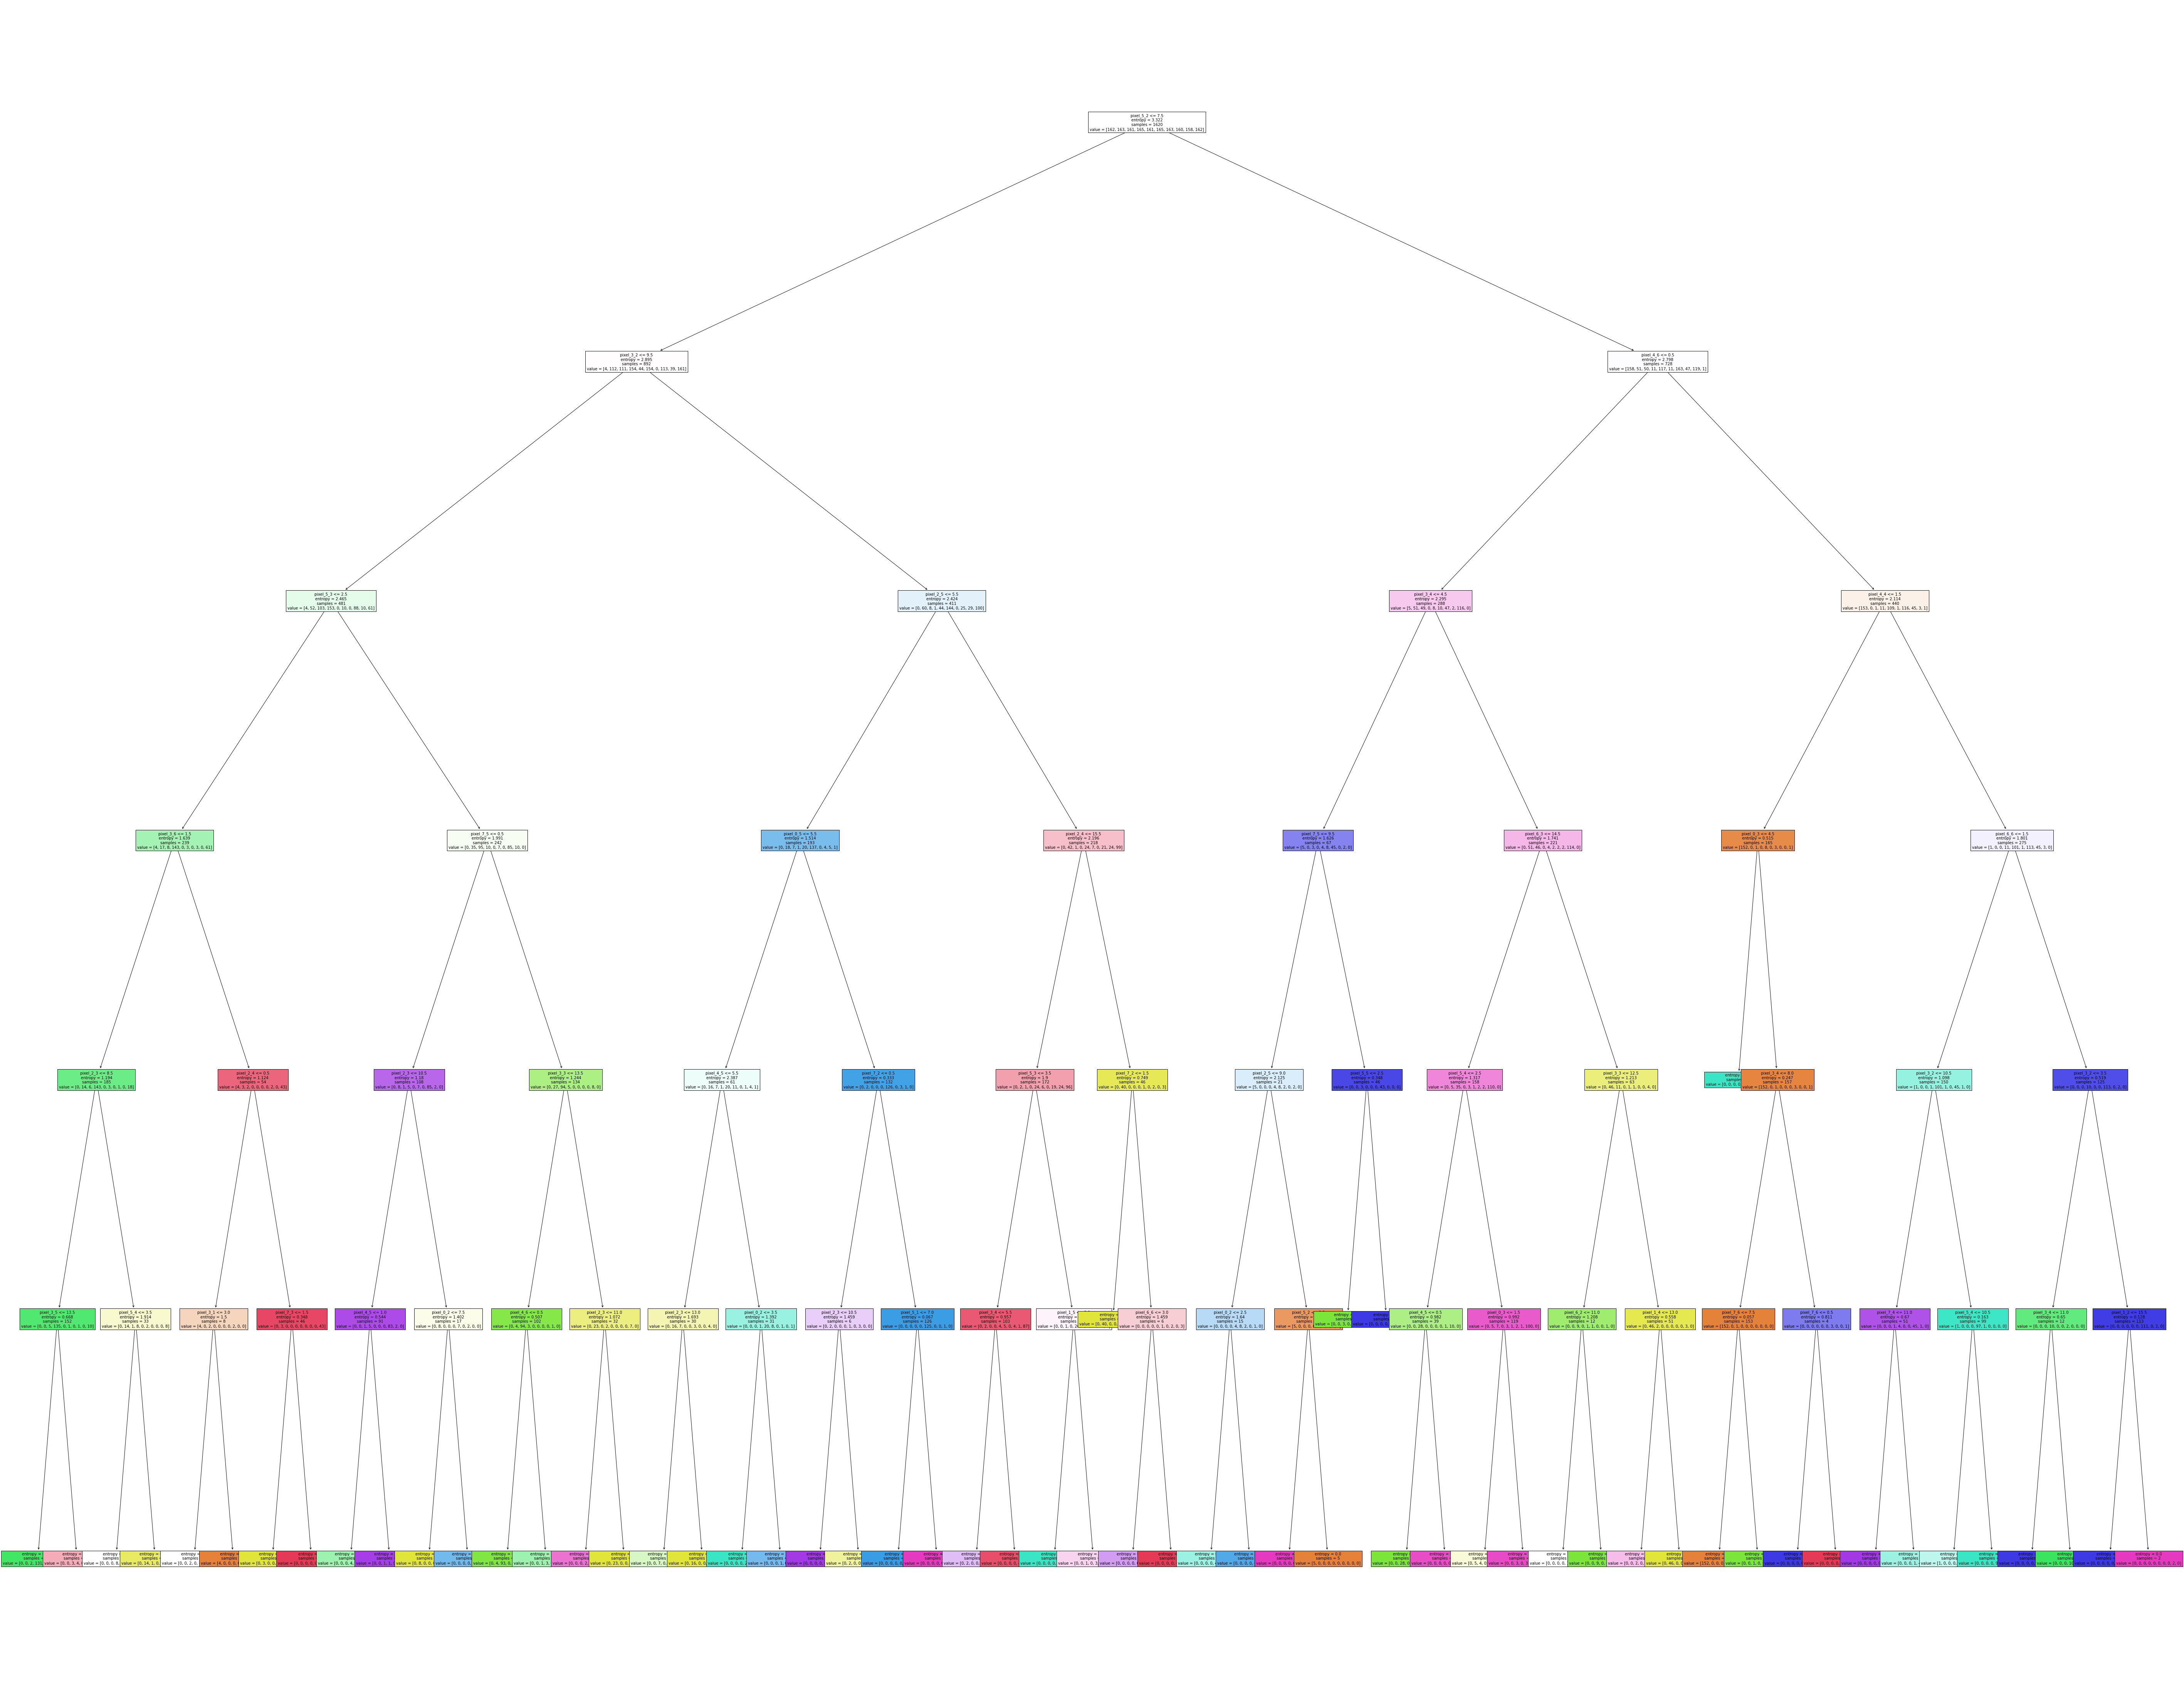

In [24]:
# Objeto de DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=6)

matrix = []
reports = []


k_folds = []
for i in range(10):
  # Conjunto de teste de iteração
  X_test = X_folds[i]
  y_test = y_folds[i]
  
  # Conjunto de treino para x e y, todos aqueles que não fazem parte do teste
  x_train = pd.DataFrame()
  for fold in X_folds:
    if X_test.equals(fold) == False:
      x_train = pd.concat([x_train, fold])

      
  y_train = pd.DataFrame()
  for fold in y_folds:
    if y_test.equals(fold) == False:
      y_train = pd.concat([y_train, fold])
      
  # Treinando o modelo
  model = clf.fit(x_train, y_train)
  
  # Testando o modelo
  y_pred = model.predict(X_test)
  
  matrix.append(confusion_matrix(y_test, y_pred))
  reports.append(classification_report(y_test, y_pred, output_dict=True))
  
  if i == 9:
    fig = plt.figure(figsize=(100,80))
    # Árvore gerada
    plot_tree(model,
                            feature_names=numbers.feature_names,
                            filled=True, 
                            fontsize=10)
    plt.savefig('decision_tree.png')

### Matrizes de Confusão
Plotando as matrizes de confusao.

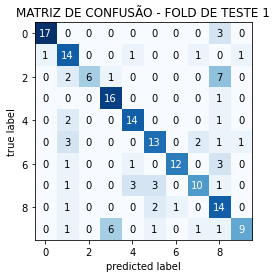

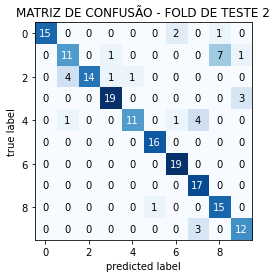

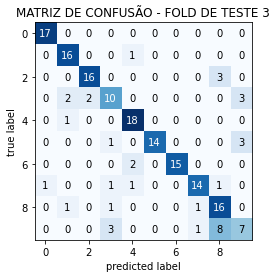

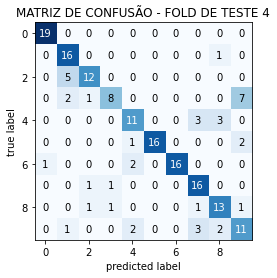

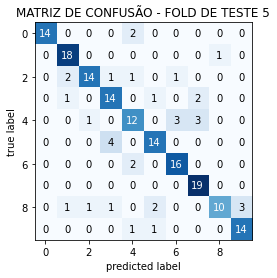

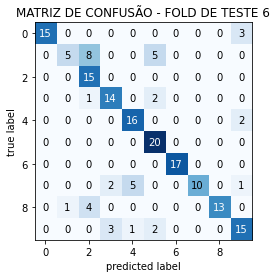

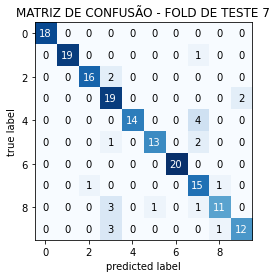

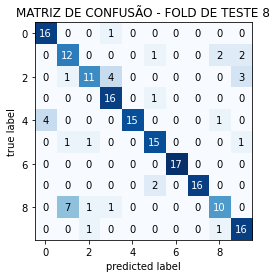

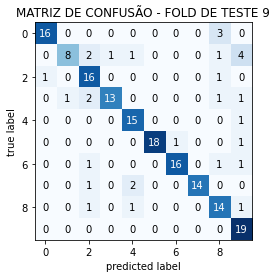

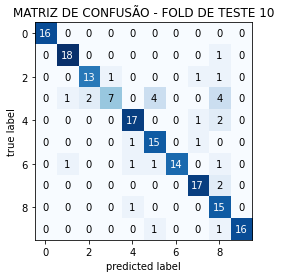

In [25]:
for i, c_matrix in enumerate(matrix, start=1):
  fig, ax = plot_confusion_matrix(conf_mat=c_matrix)
  plt.title(f'MATRIZ DE CONFUSÃO - FOLD DE TESTE {i}')
  plt.show()

### Métricas dos folds
Imprimindo as métricas dos folds.

In [26]:
for i, report in enumerate(reports, start=1):
  report = pd.DataFrame(report).transpose()
  print(f'Métricas do fold {i}:\n{report}\n\n')

Métricas do fold 1:
              precision    recall  f1-score     support
0              0.944444  0.850000  0.894737   20.000000
1              0.560000  0.777778  0.651163   18.000000
2              1.000000  0.375000  0.545455   16.000000
3              0.695652  0.941176  0.800000   17.000000
4              0.736842  0.823529  0.777778   17.000000
5              0.684211  0.650000  0.666667   20.000000
6              0.923077  0.705882  0.800000   17.000000
7              0.714286  0.555556  0.625000   18.000000
8              0.437500  0.777778  0.560000   18.000000
9              0.818182  0.473684  0.600000   19.000000
accuracy       0.694444  0.694444  0.694444    0.694444
macro avg      0.751419  0.693038  0.692080  180.000000
weighted avg   0.749863  0.694444  0.693492  180.000000


Métricas do fold 2:
              precision    recall  f1-score     support
0              1.000000  0.833333  0.909091   18.000000
1              0.687500  0.550000  0.611111   20.000000
2     

Calculando as médias e desvios padrões de cada classe final possível para as 4 métricas do classification_report().

In [27]:
# Declarando as listas para as métricas
precision = [[], [], [],[], [], [],[], [], [], [], [], []]
recall = [[], [], [],[], [], [],[], [], [], [], [], []]
f1 = [[], [], [],[], [], [],[], [], [], [], [], []]
support = [[], [], [],[], [], [],[], [], [], [], [], []]
ac = []
ma = [[], [], [], []]
wa = [[], [], [], []]
for report in reports:
  data = pd.DataFrame(report).transpose()
  for i in range(10):
    precision[i].append(data['precision'][i])
    recall[i].append(data['recall'][i])
    f1[i].append(data['f1-score'][i])
    support[i].append(data['support'][i])
  
  # acurracy
  ac.append(data['precision'][10])
  
  # macro avg
  ma[0].append(data['precision'][11])
  ma[1].append(data['recall'][11])
  ma[2].append(data['f1-score'][11])
  ma[3].append(data['support'][11] / 10)
  
  # weightened
  wa[0].append(data['precision'][12])
  wa[1].append(data['recall'][12])
  wa[2].append(data['f1-score'][12])
  wa[3].append(data['support'][12] / 10)
  
  
for i in range(10):
  precision[10].append(mean(precision[i]))
  precision[11].append(std(precision[i]))
  recall[10].append(mean(recall[i]))
  recall[11].append(std(recall[i]))
  f1[10].append(mean(f1[i]))
  f1[11].append(mean(f1[i]))
  support[10].append(mean(support[i]))
  support[11].append(std(support[i]))

# aqui uma matriz 
data = array([precision[10],
              precision[11],
              recall[10],
              recall[11],
              f1[10],
              f1[11],
              support[10],
              support[11]])

final_data = pd.DataFrame(
  {
    'precision - media' : data[0],
    'precision - dp' : data[1],
    'recall - media' : data[2], 
    'recall - dp' : data[3], 
    'f1-score - media' : data[4], 
    'f1-score - dp' : data[5],
    'support-media': data[6], 
    'support-dp' : data[7],
  }
)

final_data

,precision - media,precision - dp,recall - media,recall - dp,f1-score - media,f1-score - dp,support-media,support-dp
0,0.958007,0.058735,0.917495,0.073485,0.934579,0.934579,17.8,1.249000
1,0.772600,0.138605,0.750912,0.231253,0.734674,0.734674,18.2,1.166190
2,0.838881,0.135545,0.752905,0.169673,0.768167,0.768167,17.7,1.552417
3,0.767167,0.098938,0.739585,0.191248,0.732281,0.732281,18.3,1.676305
4,0.819260,0.115133,0.790076,0.113462,0.796905,0.796905,18.1,1.300000
5,0.852515,0.127443,0.847585,0.100333,0.843407,0.843407,18.2,1.469694
6,0.952789,0.067590,0.893911,0.099693,0.918461,0.918461,18.1,1.044031
7,0.828711,0.129785,0.826729,0.149990,0.812249,0.812249,17.9,0.700000
8,0.703707,0.162818,0.757471,0.133099,0.705987,0.705987,17.4,1.113553
9,0.743126,0.136516,0.733812,0.192112,0.727415,0.727415,18.0,1.732051


### Médias e Desvios Padrões
Calculando e imprimindo as médias e desvios padrões das métricas acurracy(única para cada fold), macro avg e weighted avg, sendo que as duas últimas possuem valores próprios para as métricas precision, recall, f1-score e supoort.

In [28]:
print('Análises da métrica - ACCURACY\n')

print(f'Média: {mean(ac)}\n\
Desvio padrão: {std(ac)}\n')

Análises da métrica - ACCURACY

Média: 0.8002824858757063
Desvio padrão: 0.04568863984308802



In [29]:
print('Análises da métrica - MACRO AVG\n')

print(f'Média precision: {mean(ma[0])}\n\
Desvio padrão precision: {std(ma[0])}\n')

print(f'Média recall: {mean(ma[1])}\n\
Desvio padrão recall: {std(ma[1])}\n')

print(f'Média f1-score: {mean(ma[2])}\n\
Desvio padrão f1-score: {std(ma[2])}\n')

print(f'Média support: {mean(ma[3])}\n\
Desvio padrão support: {std(ma[3])}\n')

Análises da métrica - MACRO AVG

Média precision: 0.8236762590081493
Desvio padrão precision: 0.03825903938810894

Média recall: 0.8010480300573178
Desvio padrão recall: 0.04526212255285675

Média f1-score: 0.7974126033116298
Desvio padrão f1-score: 0.04628569546026752

Média support: 17.97
Desvio padrão support: 0.0900000000000002



In [30]:
print('Análises da métrica - WEIGHTED AVG\n')

print(f'Média precision: {mean(wa[0])}\n\
Desvio padrão precision: {std(wa[0])}\n')

print(f'Média recall: {mean(wa[1])}\n\
Desvio padrão recall: {std(wa[1])}\n')

print(f'Média f1-score: {mean(wa[2])}\n\
Desvio padrão f1-score: {std(wa[2])}\n')

print(f'Média support: {mean(wa[3])}\n\
Desvio padrão support: {std(wa[3])}\n')

Análises da métrica - WEIGHTED AVG

Média precision: 0.8246272500898515
Desvio padrão precision: 0.03912881580485134

Média recall: 0.8002824858757063
Desvio padrão recall: 0.04568863984308802

Média f1-score: 0.7977746641420996
Desvio padrão f1-score: 0.04664570382138181

Média support: 17.97
Desvio padrão support: 0.0900000000000002

